In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Sample dataset
data = {
    'Gender': np.random.choice(['Male', 'Female'], 60),
    'Income': np.random.randint(30000, 120000, 60),
    'Spending': np.random.randint(1000, 10000, 60)
}

df = pd.DataFrame(data)
df.head()


,Gender,Income,Spending
0,Male,60442,2059
1,Male,70176,9570
2,Male,87879,8935
3,Male,51814,3551
4,Male,34636,8094


              Income     Spending
count      60.000000    60.000000
mean    74947.000000  5759.283333
std     25152.690313  2895.244330
min     32126.000000  1044.000000
25%     57253.000000  3056.000000
50%     74761.000000  5562.000000
75%     95289.750000  8346.500000
max    115868.000000  9952.000000


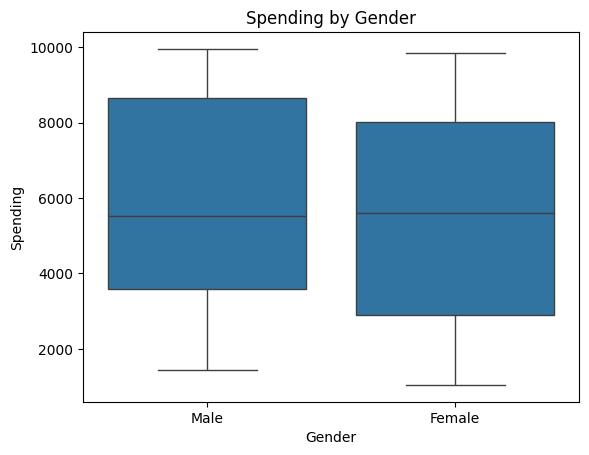

In [3]:
#Descriptive Statistics
print(df.describe())
sns.boxplot(x='Gender', y='Spending', data=df)
plt.title("Spending by Gender")
plt.show()


In [4]:
#Hypothesis Testing — Independent t-test
male_spending = df[df['Gender']=='Male']['Spending']
female_spending = df[df['Gender']=='Female']['Spending']

t_stat, p_val = stats.ttest_ind(male_spending, female_spending)
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("✅ There is a significant difference in spending between genders.")
else:
    print("❌ No significant difference found.")


T-statistic: 0.6278943317234361
P-value: 0.5325377181331318
❌ No significant difference found.


In [5]:
#Correlation — Income vs Spending
correlation, p_corr = stats.pearsonr(df['Income'], df['Spending'])
print("Correlation:", correlation)
print("P-value:", p_corr)

if p_corr < 0.05:
    print("✅ Income and spending are significantly correlated.")
else:
    print("❌ No significant correlation found.")


Correlation: 0.016036730546279663
P-value: 0.9032042029542753
❌ No significant correlation found.


In [6]:
#ANOVA (3 income groups)
df['IncomeGroup'] = pd.cut(df['Income'], bins=[0,50000,80000,120000],
                           labels=['Low','Medium','High'])

anova_result = stats.f_oneway(
    df[df['IncomeGroup']=='Low']['Spending'],
    df[df['IncomeGroup']=='Medium']['Spending'],
    df[df['IncomeGroup']=='High']['Spending']
)

print("F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
    print("✅ Significant difference in spending between income groups.")
else:
    print("❌ No significant difference between income groups.")


F-statistic: 0.6996817232302152
P-value: 0.5009589695036933
❌ No significant difference between income groups.
